In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
import scipy
import scipy.cluster.hierarchy as sch

In [2]:
w_dir = os.getcwd()
files = [_ for _ in os.listdir() if 'npz' in _]

print(files)

['vgg_15_BN_64.npz', 'resnet_preact_bottleneck_164.npz', 'wrn_28_10_cutout16.npz', 'resnext_29_8x64d.npz', 'shake_shake_26_2x64d_SSI_cutout16.npz', 'densenet_BC_100_12.npz', 'resnet_basic_110.npz', 'pyramidnet_basic_110_270.npz']


In [3]:
# wrn_pretrain

#wrn_control lr 0.001 seed 0 epoch 5

#wrn_optimal: lr 0.001 seed 0 epoch 34


ground_labels = np.int_(np.load('test_set_cifar_labels.npy'))
categories = ['plane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(files)

def file_loader(path):
    a = np.load(path)
    return a['labels'], a['outputs'], a['accuracy']

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

softmaxes = softmax(file_loader(files[0])[1])
print(softmaxes)

['vgg_15_BN_64.npz', 'resnet_preact_bottleneck_164.npz', 'wrn_28_10_cutout16.npz', 'resnext_29_8x64d.npz', 'shake_shake_26_2x64d_SSI_cutout16.npz', 'densenet_BC_100_12.npz', 'resnet_basic_110.npz', 'pyramidnet_basic_110_270.npz']
[[  2.98748141e-13   2.13174495e-11   6.10703545e-12 ...,   2.36353623e-12
    9.24824800e-12   2.64940370e-12]
 [  3.90359467e-10   1.03469466e-09   1.55686025e-13 ...,   2.34652098e-12
    1.25997094e-03   9.46878860e-12]
 [  3.81057599e-12   2.34644770e-09   1.12028106e-12 ...,   7.38261394e-13
    1.84892517e-04   8.07630421e-11]
 ..., 
 [  3.27169966e-14   3.89193261e-11   4.57047854e-12 ...,   2.45741812e-11
    3.25903475e-12   2.19365693e-12]
 [  5.54495523e-13   4.39471733e-05   8.39086938e-13 ...,   2.27185480e-12
    7.76775311e-11   1.04294837e-11]
 [  2.89294413e-13   7.00394950e-11   3.78942841e-12 ...,   4.80552262e-05
    1.15754576e-11   1.00482999e-11]]


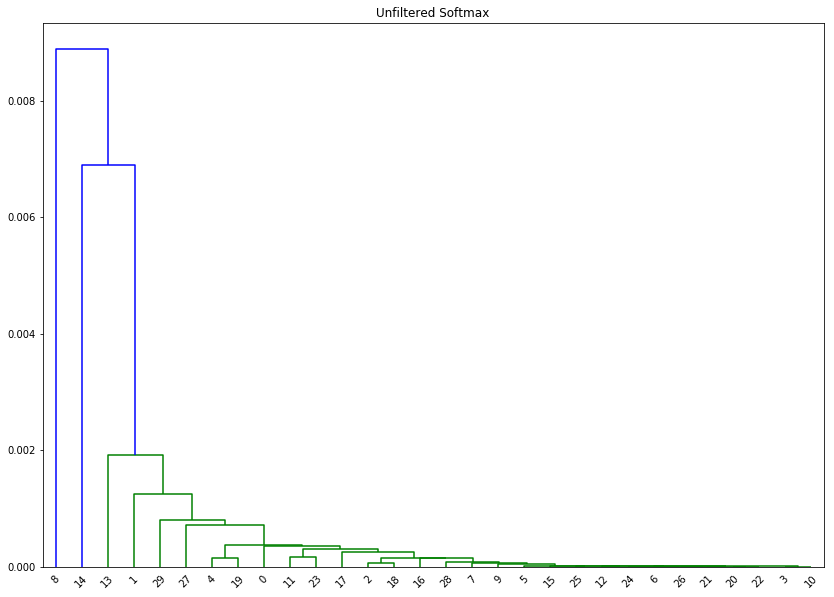

In [8]:
plt_size = (14,10)

fig = plt.figure(figsize=plt_size)
method= 'centroid'
# thresh = 2.5

ext = '.png'#.jpg' # '.png'

plt.title('Unfiltered Softmax')
Y = sch.linkage(softmaxes[:30], method=method)
Z2 = sch.dendrogram(Y)#, color_threshold=1.85)#,no_labels=True)
#locs, labels = plt.xticks()
#label_names = np.array([int(x.get_text()) for x in labels])
#new_labels = ['Bird' if inv_mappings[x+1] in set(image_nums_b) 
#              else 'Plane' for x in label_names] # add 1 to index
#axes.set_xticklabels(new_labels)
plt.setp(labels, rotation=90)
plt.show()

In [4]:
# make human matrices


(10000, 10) [[ 0.  1.  1. 48.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0. 50.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 52.  0.]
 [38.  0.  8.  0.  1.  0.  1.  0.  2.  1.]
 [ 0.  0.  1.  0.  0.  0. 50.  0.  0.  0.]]
(10000,) [3 8 8 0 6]
